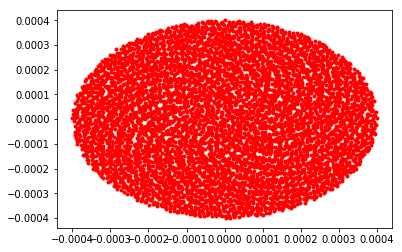

In [80]:
import ghalton as gt
import numpy as np
import matplotlib.pyplot as plt

infile = 'partcl.data'
# skip the first row which is the particle number
M  = np.loadtxt(infile,skiprows=1)
Np = np.shape(M)[0]

rb = 0.4e-3

startFrom = int(1e3) 
seq = gt.Halton(4) 
X0  = np.array(seq.get(Np+startFrom))

# transform to cross circle distribution
r = rb*np.sqrt(X0[startFrom:,1])
theta = 2*np.pi*X0[startFrom:,3]

x = r*np.cos(theta)
y = r*np.sin(theta)

# plt.plot(x,y,'r.')
# replace the x and y with halton uniform distribution
M[:,0] = x
M[:,2] = y
plt.plot(M[:,0],M[:,2],'r.')

# first line of particle number
line1 = np.array([Np,0,0])

# quad on
# ========
f = open(infile+'.quadON','w')

saveformat = '%22.15e %22.15e %22.15e %22.15e \
%22.15e %22.15e %22.15e %22.15e %d'

np.savetxt(f,line1.reshape((1,3)),fmt='%d')
np.savetxt(f,M,fmt=saveformat)
f.close()
        

# quad off
# ========
M[:,1] = 0;
M[:,3] = 0;

f = open(infile+".quadOFF",'w')
np.savetxt(f,line1.reshape((1,3)),fmt='%d')
np.savetxt(f,M,fmt=saveformat)
f.close()

In [ ]:
import